In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

#### Load Data

In [2]:
df = pd.read_csv('W5_3_HW data/HW5_PRSA_Data_Tiantan.csv')

In [3]:
df.shape

(35064, 18)

In [4]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [6]:
df['datetime']=df['year'].astype(str).str.cat([df['month'].astype(str),df['day'].astype(str),df['hour'].astype(str)], sep='-')
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan,2013-3-1-0
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan,2013-3-1-1
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan,2013-3-1-2
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan,2013-3-1-3
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan,2013-3-1-4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        35064 non-null  int64  
 1   year      35064 non-null  int64  
 2   month     35064 non-null  int64  
 3   day       35064 non-null  int64  
 4   hour      35064 non-null  int64  
 5   PM2.5     34387 non-null  float64
 6   PM10      34467 non-null  float64
 7   SO2       33946 non-null  float64
 8   NO2       34320 non-null  float64
 9   CO        33938 non-null  float64
 10  O3        34221 non-null  float64
 11  TEMP      35044 non-null  float64
 12  PRES      35044 non-null  float64
 13  DEWP      35044 non-null  float64
 14  RAIN      35044 non-null  float64
 15  wd        34986 non-null  object 
 16  WSPM      35050 non-null  float64
 17  station   35064 non-null  object 
 18  datetime  35064 non-null  object 
dtypes: float64(11), int64(5), object(3)
memory usage: 5.1+ MB


In [8]:
df['datetime']=pd.to_datetime(df['datetime'],format='%Y-%m-%d-%H')
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan,2013-03-01 00:00:00
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan,2013-03-01 01:00:00
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan,2013-03-01 03:00:00
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan,2013-03-01 04:00:00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   No        35064 non-null  int64         
 1   year      35064 non-null  int64         
 2   month     35064 non-null  int64         
 3   day       35064 non-null  int64         
 4   hour      35064 non-null  int64         
 5   PM2.5     34387 non-null  float64       
 6   PM10      34467 non-null  float64       
 7   SO2       33946 non-null  float64       
 8   NO2       34320 non-null  float64       
 9   CO        33938 non-null  float64       
 10  O3        34221 non-null  float64       
 11  TEMP      35044 non-null  float64       
 12  PRES      35044 non-null  float64       
 13  DEWP      35044 non-null  float64       
 14  RAIN      35044 non-null  float64       
 15  wd        34986 non-null  object        
 16  WSPM      35050 non-null  float64       
 17  station   35

In [10]:
df=df.set_index(df['datetime'])
df.drop(['datetime','No','station','year','month','day','hour'],axis=1,inplace=True)
df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
datetime,,,,,,,,,,,,
2013-03-01 00:00:00,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7
2013-03-01 01:00:00,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9
2013-03-01 02:00:00,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3
2013-03-01 03:00:00,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9
2013-03-01 04:00:00,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2


In [12]:
df2=pd.DataFrame()
df2['PRES_mean']=df['PRES'].resample('D').mean().round(2)
df2['PRES_max']=df['PRES'].resample('D').max().round(2)
df2['PRES_min']=df['PRES'].resample('D').min().round(2)
df2['PRES_std']=df['PRES'].resample('D').std().round(2)
df2.head()

,PRES_mean,PRES_max,PRES_min,PRES_std
datetime,,,,
2013-03-01,1028.78,1032.9,1024.5,2.33
2013-03-02,1028.85,1033.2,1023.2,3.49
2013-03-03,1016.46,1022.3,1012.0,2.95
2013-03-04,1019.45,1022.6,1017.5,1.66
2013-03-05,1012.70,1017.0,1009.0,2.83


In [13]:
df1=df.resample('D').mean().round(2)
df1.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
datetime,,,,,,,,,,,
2013-03-01,8.62,14.46,8.88,21.58,450.00,68.08,1.32,1028.78,-21.47,0.0,3.31
2013-03-02,31.71,37.04,27.17,50.48,934.78,34.04,0.49,1028.85,-16.96,0.0,0.79
2013-03-03,98.04,121.33,55.62,82.96,2028.96,16.92,4.99,1016.46,-12.31,0.0,1.22
2013-03-04,22.33,37.58,16.58,42.04,895.79,53.12,10.56,1019.45,-14.00,0.0,2.50
2013-03-05,141.67,156.38,74.33,101.67,2408.00,94.00,7.21,1012.70,-7.78,0.0,0.91


In [14]:
#Confirm data type. Datetime is a string rather than a datestamp
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2013-03-01 to 2017-02-28
Freq: D
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   1461 non-null   float64
 1   PM10    1461 non-null   float64
 2   SO2     1440 non-null   float64
 3   NO2     1458 non-null   float64
 4   CO      1455 non-null   float64
 5   O3      1457 non-null   float64
 6   TEMP    1461 non-null   float64
 7   PRES    1461 non-null   float64
 8   DEWP    1461 non-null   float64
 9   RAIN    1461 non-null   float64
 10  WSPM    1461 non-null   float64
dtypes: float64(11)
memory usage: 137.0 KB


In [15]:
df2=df1[['PRES']]
df2.head()

,PRES
datetime,
2013-03-01,1028.78
2013-03-02,1028.85
2013-03-03,1016.46
2013-03-04,1019.45
2013-03-05,1012.70


#### Explore Data

In [16]:
df2.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
PRES,1461.0,1012.552183,10.064326,990.35,1004.02,1012.47,1020.96,1039.95


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2013-03-01 to 2017-02-28
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRES    1461 non-null   float64
dtypes: float64(1)
memory usage: 22.8 KB


In [20]:
dt.datetime(2017,2,28)-dt.datetime(2013,3,1)

datetime.timedelta(days=1460)

<AxesSubplot:xlabel='datetime'>

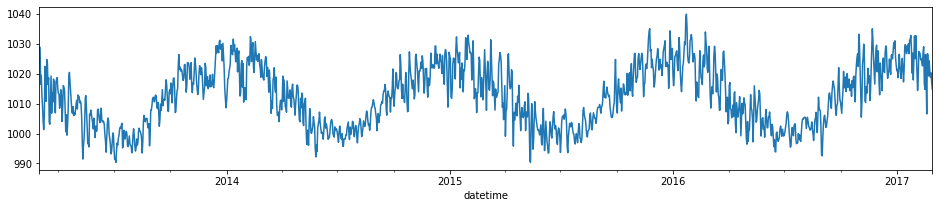

In [21]:
df2['PRES'].plot(figsize=(16,3))

#### Preprocess Data

In [22]:
test_start_day=pd.to_datetime('2017-02-14')

In [23]:
df_train=df2.loc[:test_start_day-pd.Timedelta(days=1)]
df_test=df2.loc[test_start_day:]

In [24]:
df_train.tail()

,PRES
datetime,
2017-02-09,1024.69
2017-02-10,1025.02
2017-02-11,1024.10
2017-02-12,1022.64
2017-02-13,1027.20


In [25]:
df_test.head()

,PRES
datetime,
2017-02-14,1029.03
2017-02-15,1016.74
2017-02-16,1014.79
2017-02-17,1026.46
2017-02-18,1018.10


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df_train)
df2['PRES_scaled']=scaler.transform(df2)
df2.head()

,PRES,PRES_scaled
datetime,,
2013-03-01,1028.78,0.774798
2013-03-02,1028.85,0.776210
2013-03-03,1016.46,0.526411
2013-03-04,1019.45,0.586694
2013-03-05,1012.70,0.450605


<AxesSubplot:xlabel='datetime'>

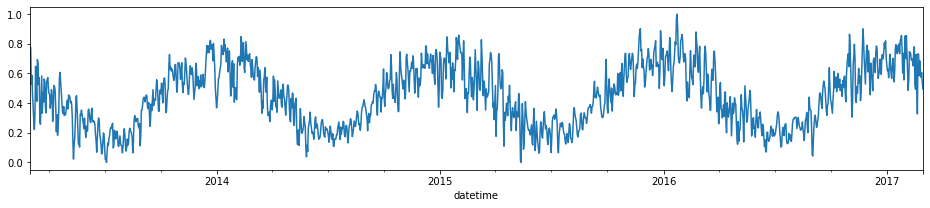

In [27]:
df2['PRES_scaled'].plot(figsize=(16,3))

In [28]:
df2['PRES_lag1']=df2['PRES_scaled'].tshift(periods=1)
df2['PRES_lag365']=df2['PRES_scaled'].tshift(periods=365)
df2['PRES_diff1']=df2['PRES_scaled'].diff(periods=1)
df2['PRES_diff365']=df2['PRES_scaled'].diff(periods=365)

In [29]:
df2[360:370]

,PRES,PRES_scaled,PRES_lag1,PRES_lag365,PRES_diff1,PRES_diff365
datetime,,,,,,
2014-02-24,1023.26,0.663508,0.733065,NaN,-0.069556,NaN
2014-02-25,1021.89,0.635887,0.663508,NaN,-0.027621,NaN
2014-02-26,1018.83,0.574194,0.635887,NaN,-0.061694,NaN
2014-02-27,1024.73,0.693145,0.574194,NaN,0.118952,NaN
2014-02-28,1022.26,0.643347,0.693145,NaN,-0.049798,NaN
2014-03-01,1019.17,0.581048,0.643347,0.774798,-0.062298,-0.193750
2014-03-02,1018.30,0.563508,0.581048,0.776210,-0.017540,-0.212702
2014-03-03,1017.88,0.555040,0.563508,0.526411,-0.008468,0.028629
2014-03-04,1022.23,0.642742,0.555040,0.586694,0.087702,0.056048


In [30]:
df_train=df2.loc[:test_start_day-pd.Timedelta(days=1)]
df_test=df2.loc[test_start_day:]

In [31]:
df_test.head()

,PRES,PRES_scaled,PRES_lag1,PRES_lag365,PRES_diff1,PRES_diff365
datetime,,,,,,
2017-02-14,1029.03,0.779839,0.742944,0.638105,0.036895,0.141734
2017-02-15,1016.74,0.532056,0.779839,0.570565,-0.247782,-0.038508
2017-02-16,1014.79,0.492742,0.532056,0.556048,-0.039315,-0.063306
2017-02-17,1026.46,0.728024,0.492742,0.524798,0.235282,0.203226
2017-02-18,1018.10,0.559476,0.728024,0.685484,-0.168548,-0.126008


In [32]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PRES,1446.0,1012.474509,10.070576,990.350000,1003.947500,1012.350000,1020.897500,1039.950000
PRES_scaled,1446.0,0.446059,0.203036,0.000000,0.274143,0.443548,0.615877,1.000000
PRES_lag1,1445.0,0.445853,0.202956,0.000000,0.273992,0.443548,0.615121,1.000000
PRES_lag365,1081.0,0.443520,0.201748,0.000000,0.273589,0.443548,0.610484,1.000000
PRES_diff1,1445.0,-0.000022,0.086682,-0.341734,-0.052823,-0.001008,0.050000,0.330040
PRES_diff365,1081.0,0.006016,0.139141,-0.432460,-0.085282,0.004032,0.091129,0.523992


In [33]:
df_train['PRES_ma2']=df_train['PRES'].rolling(2).mean()
df_train.head()

,PRES,PRES_scaled,PRES_lag1,PRES_lag365,PRES_diff1,PRES_diff365,PRES_ma2
datetime,,,,,,,
2013-03-01,1028.78,0.774798,NaN,NaN,NaN,NaN,NaN
2013-03-02,1028.85,0.776210,0.774798,NaN,0.001411,NaN,1028.815
2013-03-03,1016.46,0.526411,0.776210,NaN,-0.249798,NaN,1022.655
2013-03-04,1019.45,0.586694,0.526411,NaN,0.060282,NaN,1017.955
2013-03-05,1012.70,0.450605,0.586694,NaN,-0.136089,NaN,1016.075


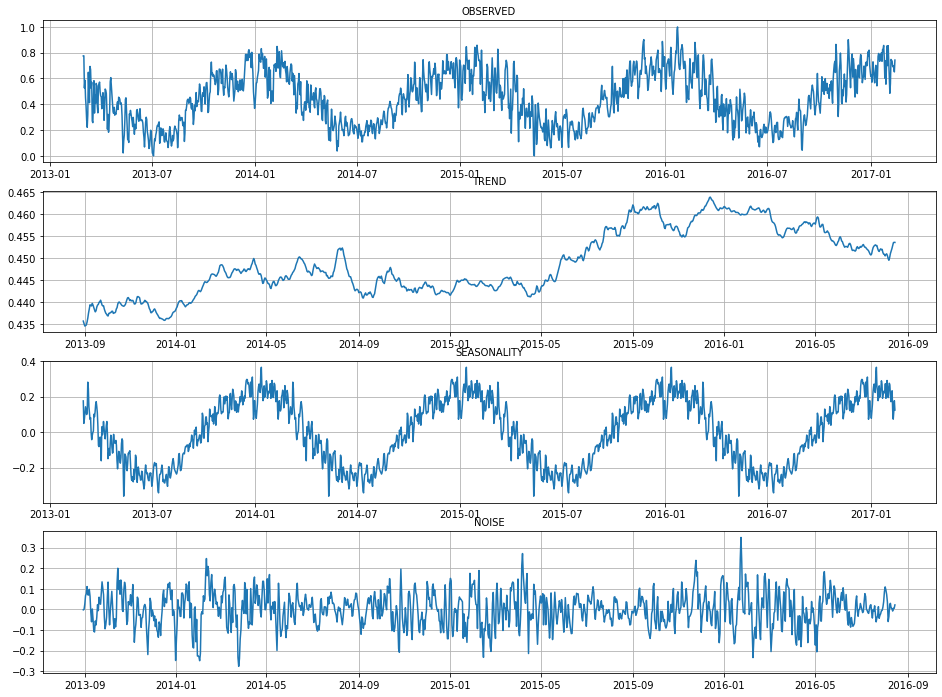

In [38]:
res=sm.tsa.seasonal_decompose(df_train['PRES_scaled'],period=365)
fig, axs = plt.subplots(4, figsize=(16,12))
axs[0].set_title('OBSERVED', fontsize=10)
axs[0].plot(res.observed)
axs[0].grid()

axs[1].set_title('TREND', fontsize=10)
axs[1].plot(res.trend)
axs[1].grid()

axs[2].set_title('SEASONALITY', fontsize=10)
axs[2].plot(res.seasonal)
axs[2].grid()

axs[3].set_title('NOISE', fontsize=10)
axs[3].plot(res.resid)
axs[3].grid()

plt.show()

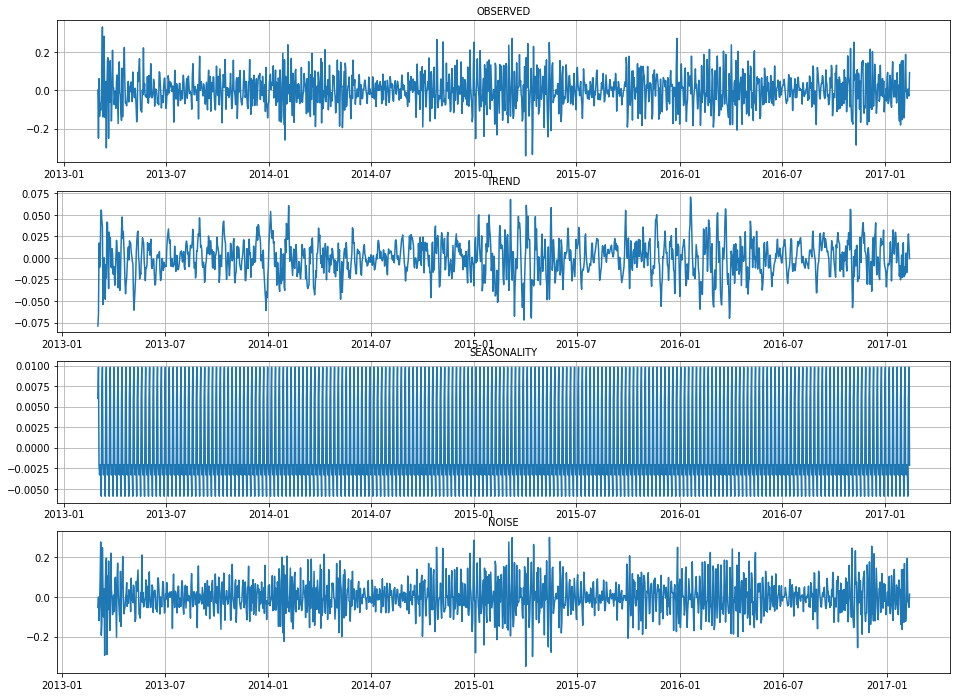

In [41]:
res_1=sm.tsa.seasonal_decompose(df_train['PRES_diff1'].dropna())
fig, axs = plt.subplots(4, figsize=(16,12))
axs[0].set_title('OBSERVED', fontsize=10)
axs[0].plot(res_1.observed)
axs[0].grid()

axs[1].set_title('TREND', fontsize=10)
axs[1].plot(res_1.trend)
axs[1].grid()

axs[2].set_title('SEASONALITY', fontsize=10)
axs[2].plot(res_1.seasonal)
axs[2].grid()

axs[3].set_title('NOISE', fontsize=10)
axs[3].plot(res_1.resid)
axs[3].grid()

plt.show()

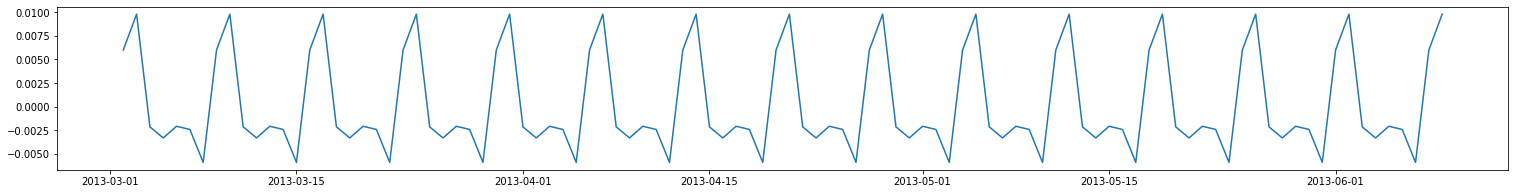

In [42]:
plt.figure(figsize=(26,3))
plt.plot(res_1.seasonal[:100])

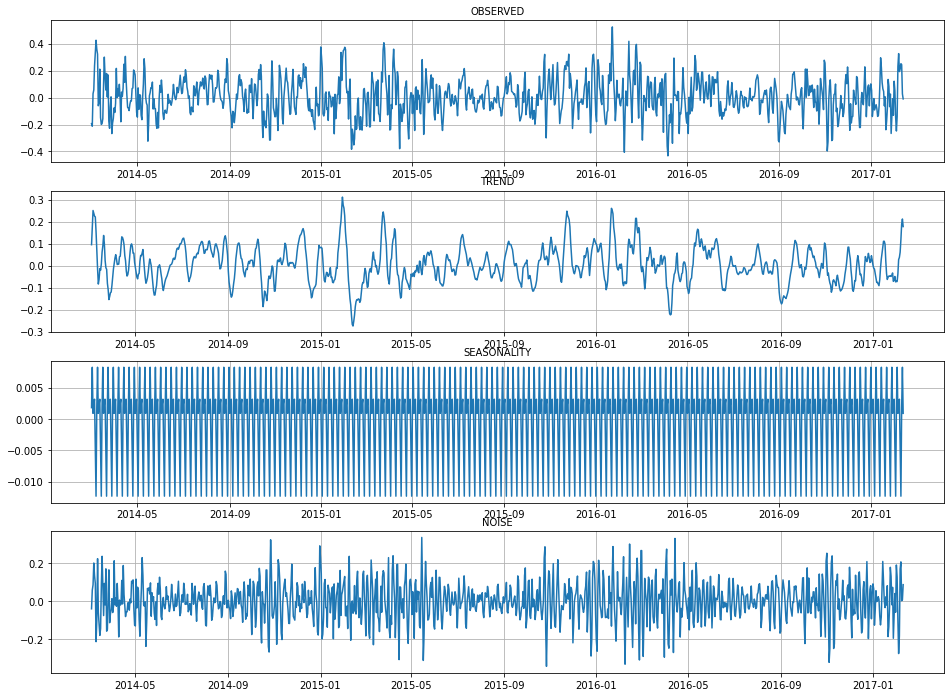

In [43]:
res_365=sm.tsa.seasonal_decompose(df_train['PRES_diff365'].dropna())
fig, axs = plt.subplots(4, figsize=(16,12))
axs[0].set_title('OBSERVED', fontsize=10)
axs[0].plot(res_365.observed)
axs[0].grid()

axs[1].set_title('TREND', fontsize=10)
axs[1].plot(res_365.trend)
axs[1].grid()

axs[2].set_title('SEASONALITY', fontsize=10)
axs[2].plot(res_365.seasonal)
axs[2].grid()

axs[3].set_title('NOISE', fontsize=10)
axs[3].plot(res_365.resid)
axs[3].grid()

plt.show()

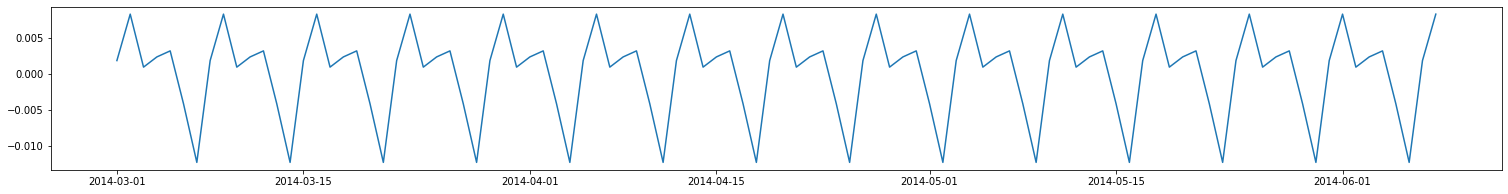

In [44]:
plt.figure(figsize=(26,3))
plt.plot(res_365.seasonal[:100])

#### AR

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

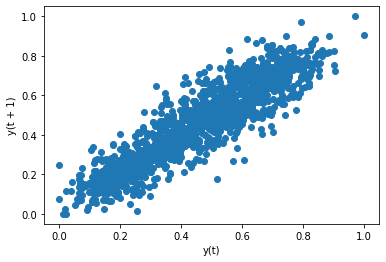

In [45]:
pd.plotting.lag_plot(df_train['PRES_scaled'])

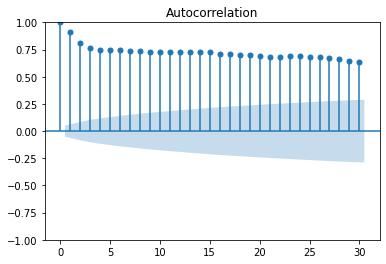

In [46]:
sm.graphics.tsa.plot_acf(df_train['PRES_scaled'],lags=30)
plt.show()

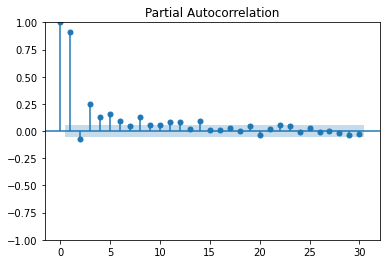

In [47]:
sm.graphics.tsa.plot_pacf(df_train['PRES_scaled'],lags=30)
plt.show()

In [54]:
from statsmodels.tsa.ar_model import AutoReg
model=AutoReg(df_train['PRES_scaled'],lags=3,trend='t',seasonal=True,period=365,exog=None,missing='drop')
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:            PRES_scaled   No. Observations:                 1446
Model:               Seas. AutoReg(3)   Log Likelihood                1884.703
Method:               Conditional MLE   S.D. of innovations              0.066
Date:                Mon, 20 Feb 2023   AIC                          -3029.405
Time:                        10:16:17   BIC                          -1077.848
Sample:                    03-04-2013   HQIC                         -2300.970
                         - 02-13-2017                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
trend           8.412e-06   4.29e-06      1.961      0.050    5.42e-09    1.68e-05
s(1,365)           0.2420      0.041      5.897      0.000       0.162       0.322
s(2,365)           0.1336      0.041      3.243      0.001       0.053       0.214
s(3,365)           0.2503      0.041      6.164      0.000       0.171       0.330
s(4,365)           0.2588      0.036      7.192      0.000       0.188       0.329
s(5,365)           0.2077      0.036      5.820      0.000       0.138       0.278
s(6,365)           0.1986      0.035      5.609      0.000       0.129       0.268
s(7,365)           0.1757      0.035      4.958      0.000       0.106       0.245
s(8,365)           0.1967      0.035      5.586      0.000       0.128       0.266
s(9,365)           0.3421      0.035      9.763      0.000       0.273       0.411
s(10,365)          0.2793      0.036      7.826      0.000       0.209       0.349
s(11,365)          0.1648      0.036      4.584      0.000       0.094       0.235
s(12,365)          0.2086      0.036      5.786      0.000       0.138       0.279
s(13,365)          0.2582      0.036      7.155      0.000       0.187       0.329
s(14,365)          0.2165      0.036      6.069      0.000       0.147       0.286
s(15,365)          0.1336      0.035      3.772      0.000       0.064       0.203
s(16,365)          0.1915      0.035      5.436      0.000       0.122       0.261
s(17,365)          0.1204      0.035      3.425      0.001       0.051       0.189
s(18,365)          0.1779      0.034      5.159      0.000       0.110       0.245
s(19,365)          0.2000      0.034      5.807      0.000       0.133       0.268
s(20,365)          0.2845      0.034      8.271      0.000       0.217       0.352
s(21,365)          0.1327      0.035      3.795      0.000       0.064       0.201
s(22,365)          0.2742      0.035      7.863      0.000       0.206       0.343
s(23,365)          0.2182      0.036      6.141      0.000       0.149       0.288
s(24,365)          0.2767      0.035      7.853      0.000       0.208       0.346
s(25,365)          0.2127      0.036      5.955      0.000       0.143       0.283
s(26,365)          0.1778      0.036      4.984      0.000       0.108       0.248
s(27,365)          0.1534      0.036      4.308      0.000       0.084       0.223
s(28,365)          0.1599      0.035      4.541      0.000       0.091       0.229
s(29,365)          0.1688      0.035      4.853      0.000       0.101       0.237
s(30,365)          0.1747      0.034      5.066      0.000       0.107       0.242
s(31,365)          0.1853      0.034      5.387      0.000       0.118       0.253
s(32,365)          0.1321      0.034      3.833      0.000       0.065       0.200
s(33,365)          0.1043      0.034      3.036      0.002       0.037       0.172
s(34,365)          0.2633      0.034      7.697      0.000       0.196       0.330
s(35,365)          0.1299      0.035      3.756      0.000       0.062       0.198
s(36

In [63]:
pred=result.predict(start='2013-3-1',end=test_start_day-pd.Timedelta(days=1))

In [64]:
df_train['pred_ar']=pred
df_train.tail(10)

,PRES,PRES_scaled,PRES_lag1,PRES_lag365,PRES_diff1,PRES_diff365,PRES_ma2,pred_ar
datetime,,,,,,,,
2017-02-04,1014.42,0.485282,0.582661,0.733468,-0.097379,-0.248185,1016.835,0.581703
2017-02-05,1018.18,0.561089,0.485282,0.699597,0.075806,-0.138508,1016.300,0.530510
2017-02-06,1027.44,0.747782,0.561089,0.517137,0.186694,0.230645,1022.810,0.643223
2017-02-07,1027.06,0.740121,0.747782,0.414113,-0.007661,0.326008,1027.250,0.751636
2017-02-08,1026.80,0.734879,0.740121,0.542339,-0.005242,0.192540,1026.930,0.730961
2017-02-09,1024.69,0.692339,0.734879,0.478427,-0.042540,0.213911,1025.745,0.623287
2017-02-10,1025.02,0.698992,0.692339,0.447984,0.006653,0.251008,1024.855,0.638952
2017-02-11,1024.10,0.680444,0.698992,0.436492,-0.018548,0.243952,1024.560,0.682152
2017-02-12,1022.64,0.651008,0.680444,0.623387,-0.029435,0.027621,1023.370,0.675874


In [72]:
df_train['pred_ar_real']=scaler.inverse_transform(np.array(pred).reshape(-1,1))
df_train.tail(10)

,PRES,PRES_scaled,PRES_lag1,PRES_lag365,PRES_diff1,PRES_diff365,PRES_ma2,pred_ar,pred_ar_real
datetime,,,,,,,,,
2017-02-04,1014.42,0.485282,0.582661,0.733468,-0.097379,-0.248185,1016.835,0.581703,1019.202465
2017-02-05,1018.18,0.561089,0.485282,0.699597,0.075806,-0.138508,1016.300,0.530510,1016.663298
2017-02-06,1027.44,0.747782,0.561089,0.517137,0.186694,0.230645,1022.810,0.643223,1022.253861
2017-02-07,1027.06,0.740121,0.747782,0.414113,-0.007661,0.326008,1027.250,0.751636,1027.631145
2017-02-08,1026.80,0.734879,0.740121,0.542339,-0.005242,0.192540,1026.930,0.730961,1026.605675
2017-02-09,1024.69,0.692339,0.734879,0.478427,-0.042540,0.213911,1025.745,0.623287,1021.265024
2017-02-10,1025.02,0.698992,0.692339,0.447984,0.006653,0.251008,1024.855,0.638952,1022.042021
2017-02-11,1024.10,0.680444,0.698992,0.436492,-0.018548,0.243952,1024.560,0.682152,1024.184762
2017-02-12,1022.64,0.651008,0.680444,0.623387,-0.029435,0.027621,1023.370,0.675874,1023.873332


In [73]:
df_train1=df_train.dropna().copy()
df_train1.head()

,PRES,PRES_scaled,PRES_lag1,PRES_lag365,PRES_diff1,PRES_diff365,PRES_ma2,pred_ar,pred_ar_real
datetime,,,,,,,,,
2014-03-01,1019.17,0.581048,0.643347,0.774798,-0.062298,-0.193750,1020.715,0.603409,1020.279067
2014-03-02,1018.30,0.563508,0.581048,0.776210,-0.017540,-0.212702,1018.735,0.467666,1013.546244
2014-03-03,1017.88,0.555040,0.563508,0.526411,-0.008468,0.028629,1018.090,0.584523,1019.342358
2014-03-04,1022.23,0.642742,0.555040,0.586694,0.087702,0.056048,1020.055,0.586818,1019.456153
2014-03-05,1024.32,0.684879,0.642742,0.450605,0.042137,0.234274,1023.275,0.606992,1020.456808


In [74]:
mean_absolute_percentage_error(df_train1['PRES_scaled'], df_train1['pred_ar'])

305832168876.7667

In [75]:
mean_absolute_percentage_error(df_train1['PRES'], df_train1['pred_ar_real'])

0.00245996557976648

In [76]:
print('MAPE:',((df_train1['PRES_scaled']-df_train1['pred_ar']).abs()/df_train1['PRES_scaled']).replace([np.inf, -np.inf], np.nan).mean())

MAPE: 0.1492586049258978


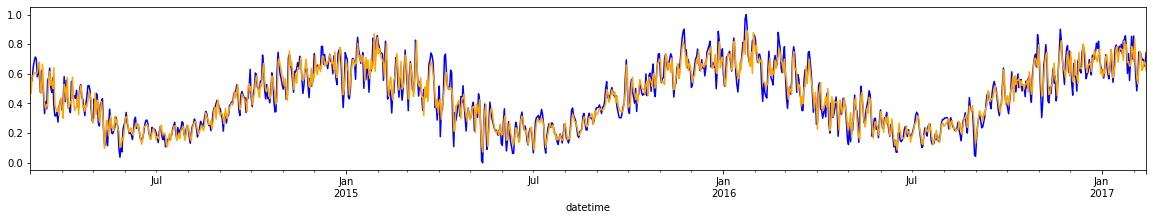

In [77]:
plt.figure(figsize=(20,3))
df_train1['PRES_scaled'].plot(color='blue')
df_train1['pred_ar'].plot(color='orange')
plt.show()

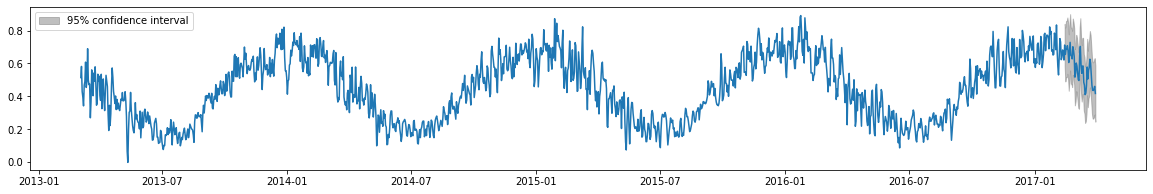

In [80]:
plt.rcParams["figure.figsize"] = (20,3)
result.plot_predict('2013-03-01','2017-03-31')
plt.show()

In [82]:
pred=result.predict(start=test_start_day,end='2017-02-28')
df_test['pred_ar']=pred
df_test

,PRES,PRES_scaled,PRES_lag1,PRES_lag365,PRES_diff1,PRES_diff365,pred_ar
datetime,,,,,,,
2017-02-14,1029.03,0.779839,0.742944,0.638105,0.036895,0.141734,0.712506
2017-02-15,1016.74,0.532056,0.779839,0.570565,-0.247782,-0.038508,0.655074
2017-02-16,1014.79,0.492742,0.532056,0.556048,-0.039315,-0.063306,0.688271
2017-02-17,1026.46,0.728024,0.492742,0.524798,0.235282,0.203226,0.687363
2017-02-18,1018.10,0.559476,0.728024,0.685484,-0.168548,-0.126008,0.708622
2017-02-19,1006.55,0.326613,0.559476,0.724194,-0.232863,-0.397581,0.677586
2017-02-20,1026.70,0.732863,0.326613,0.644153,0.406250,0.088710,0.605761
2017-02-21,1026.43,0.727419,0.732863,0.667339,-0.005444,0.060081,0.667169
2017-02-22,1019.29,0.583468,0.727419,0.879839,-0.143952,-0.296371,0.728908


In [85]:
print('MAPE:', mean_absolute_percentage_error(df_test['PRES_scaled'],df_test['pred_ar']))

MAPE: 0.2353737922823204


In [84]:
df_test['pred_ar_real']=scaler.inverse_transform(np.array(pred).reshape(-1,1))
print('MAPE:', mean_absolute_percentage_error(df_test['PRES'],df_test['pred_ar_real']))

MAPE: 0.005736426017116019


In [86]:
print('MAPE:',((df_test['PRES_scaled']-df_test['pred_ar']).abs()/df_test['PRES_scaled']).replace([np.inf, -np.inf], np.nan).mean())

MAPE: 0.23537379228232042


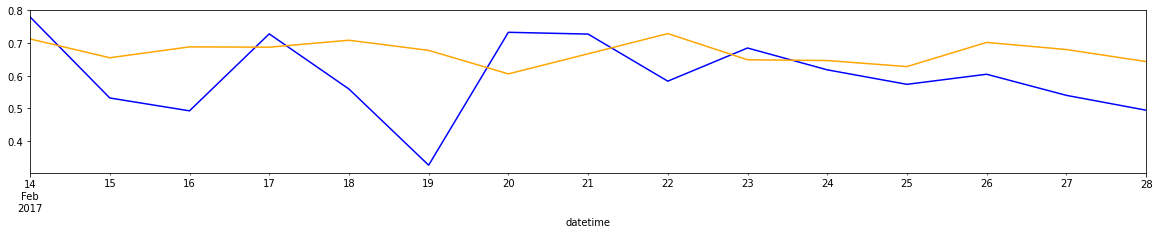

In [87]:
df_test['PRES_scaled'].plot(color='blue')
df_test['pred_ar'].plot(color='orange')
plt.show()

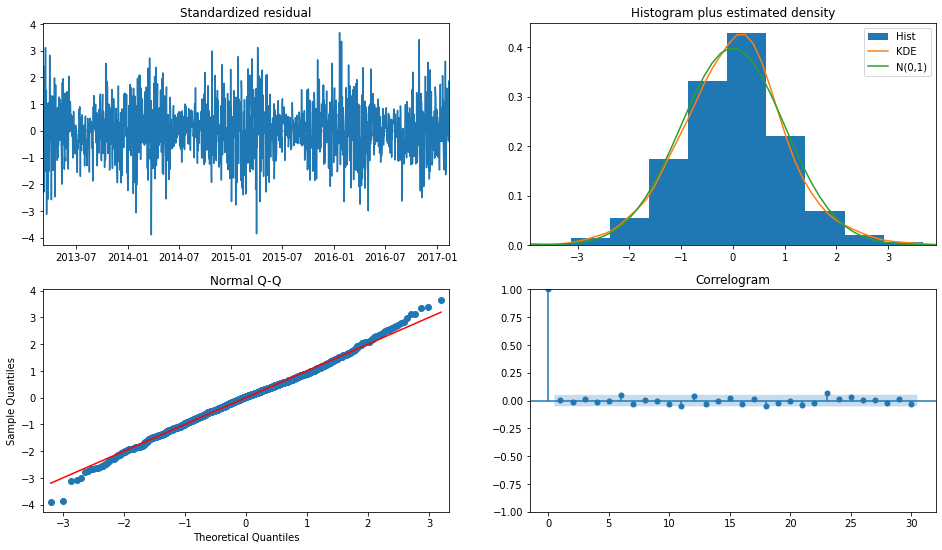

In [88]:
result.plot_diagnostics(figsize=(16,9),lags=30)
plt.show()

In [89]:
df_test['pred_ar_real']=scaler.inverse_transform(df_test[['pred_ar']])
df_test.head()

,PRES,PRES_scaled,PRES_lag1,PRES_lag365,PRES_diff1,PRES_diff365,pred_ar,pred_ar_real
datetime,,,,,,,,
2017-02-14,1029.03,0.779839,0.742944,0.638105,0.036895,0.141734,0.712506,1025.690293
2017-02-15,1016.74,0.532056,0.779839,0.570565,-0.247782,-0.038508,0.655074,1022.841678
2017-02-16,1014.79,0.492742,0.532056,0.556048,-0.039315,-0.063306,0.688271,1024.488242
2017-02-17,1026.46,0.728024,0.492742,0.524798,0.235282,0.203226,0.687363,1024.443219
2017-02-18,1018.10,0.559476,0.728024,0.685484,-0.168548,-0.126008,0.708622,1025.497630


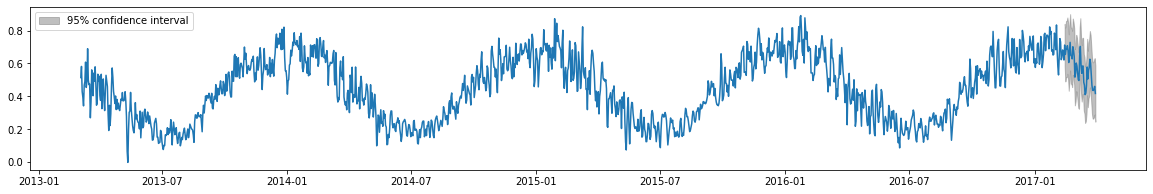

In [90]:
# March 2017
plt.rcParams["figure.figsize"] = (20,3)
result.plot_predict('2013-03-01','2017-03-31')
plt.show()

#### AR1

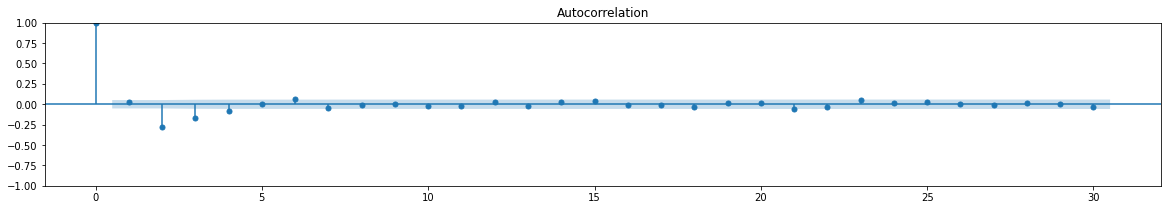

In [91]:
sm.graphics.tsa.plot_acf(df_train['PRES_diff1'].dropna(),lags=30)
plt.show()

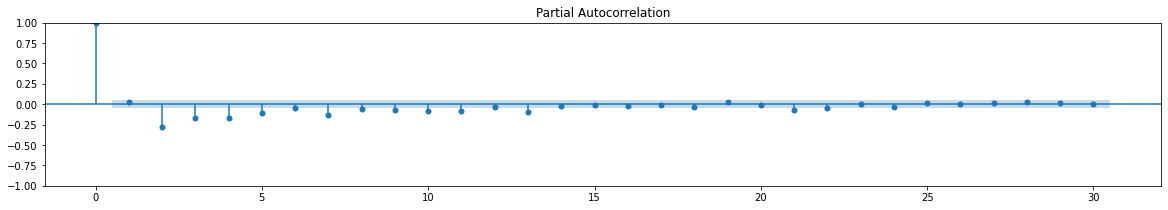

In [92]:
sm.graphics.tsa.plot_pacf(df_train['PRES_diff1'].dropna(),lags=30)
plt.show()

In [93]:
model=AutoReg(df_train['PRES_diff1'].dropna(),lags=7,trend='t',seasonal=True,period=7,exog=None,missing='drop')
result1=model.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:             PRES_diff1   No. Observations:                 1445
Model:               Seas. AutoReg(7)   Log Likelihood                1613.091
Method:               Conditional MLE   S.D. of innovations              0.079
Date:                Mon, 20 Feb 2023   AIC                          -3194.182
Time:                        10:34:53   BIC                          -3109.845
Sample:                    03-09-2013   HQIC                         -3162.697
                         - 02-13-2017                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
trend          1.402e-06   5.01e-06      0.280      0.780   -8.41e-06    1.12e-05
s(1,7)            0.0036      0.007      0.542      0.588      -0.009       0.016
s(2,7)            0.0066      0.007      1.004      0.316      -0.006       0.020
s(3,7)           -0.0022      0.007     -0.327      0.744      -0.015       0.011
s(4,7)           -0.0009      0.007     -0.144      0.886      -0.014       0.012
s(5,7)           -0.0013      0.007     -0.201      0.840      -0.014       0.012
s(6,7)           -0.0019      0.007     -0.280      0.779      -0.015       0.011
s(7,7)           -0.0073      0.007     -1.108      0.268      -0.020       0.006
PRES_diff1.L1    -0.0738      0.026     -2.829      0.005      -0.125      -0.023
PRES_diff1.L2    -0.3733      0.026    -14.324      0.000      -0.424      -0.322
PRES_diff1.L3    -0.2411      0.028     -8.765      0.000      -0.295      -0.187
PRES_diff1.L4    -0.2266      0.028     -8.237      0.000      -0.281      -0.173
PRES_diff1.L5    -0.1631      0.027     -5.940      0.000      -0.217      -0.109
PRES_diff1.L6    -0.0591      0.026     -2.279      0.023      -0.110      -0.008
PRES_diff1.L7    -0.1416      0.026     -5.468      0.000      -0.192      -0.091
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3865           -0.0000j            1.3865           -0.5000
AR.2           -0.7619           -1.0913j            1.3310           -0.3470
AR.3           -0.7619           +1.0913j            1.3310            0.3470
AR.4            0.9496           -0.8466j            1.2722           -0.1159
AR.5            0.9496           +0.8466j            1.2722            0.1159
AR.6            0.2970           -1.2996j            1.3331           -0.2142
AR.7            0.2970           +1.2996j            1.3331            0.2142
-----------------------------------------------------------------------------
"""

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1440x216 with 0 Axes>

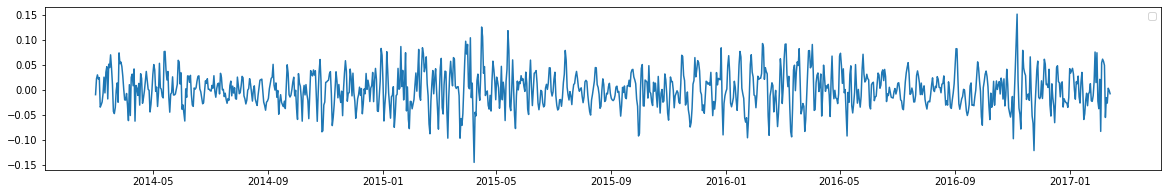

In [94]:
plt.figure(figsize=(20,3))
result1.plot_predict('2014-3-1',test_start_day-pd.Timedelta(days=1))
plt.show()

In [95]:
pred1=result1.predict(start=test_start_day,end='2017-02-28')
df_test['pred_ar1']=pred1
df_test['pred_ar1']=df_test['pred_ar1']+df_test['PRES_lag1']
df_test

,PRES,PRES_scaled,PRES_lag1,PRES_lag365,PRES_diff1,PRES_diff365,pred_ar,pred_ar_real,pred_ar1
datetime,,,,,,,,,
2017-02-14,1029.03,0.779839,0.742944,0.638105,0.036895,0.141734,0.712506,1025.690293,0.759522
2017-02-15,1016.74,0.532056,0.779839,0.570565,-0.247782,-0.038508,0.655074,1022.841678,0.758463
2017-02-16,1014.79,0.492742,0.532056,0.556048,-0.039315,-0.063306,0.688271,1024.488242,0.520783
2017-02-17,1026.46,0.728024,0.492742,0.524798,0.235282,0.203226,0.687363,1024.443219,0.476386
2017-02-18,1018.10,0.559476,0.728024,0.685484,-0.168548,-0.126008,0.708622,1025.497630,0.729814
2017-02-19,1006.55,0.326613,0.559476,0.724194,-0.232863,-0.397581,0.677586,1023.958275,0.577698
2017-02-20,1026.70,0.732863,0.326613,0.644153,0.406250,0.088710,0.605761,1020.395758,0.320470
2017-02-21,1026.43,0.727419,0.732863,0.667339,-0.005444,0.060081,0.667169,1023.441568,0.731632
2017-02-22,1019.29,0.583468,0.727419,0.879839,-0.143952,-0.296371,0.728908,1026.503845,0.732072


In [96]:
print('MAPE:', mean_absolute_percentage_error(df_test['PRES_scaled'],df_test['pred_ar1']))

MAPE: 0.2218515252692749


In [97]:
print('MAPE:',((df_test['PRES_scaled']-df_test['pred_ar1']).abs()/df_test['PRES_scaled']).replace([np.inf, -np.inf], np.nan).mean())

MAPE: 0.22185152526927493


In [112]:
df_test['pred_ar1_real']=scaler.inverse_transform(df_test[['pred_ar1']])
print('MAPE:', mean_absolute_percentage_error(df_test['PRES'],df_test['pred_ar1_real']))

MAPE: 0.006014900013023741


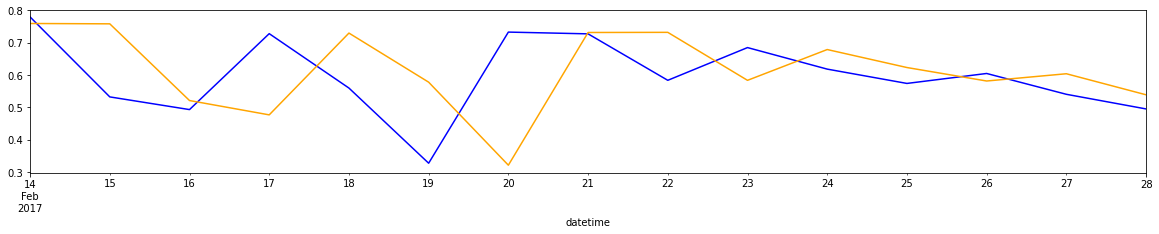

In [99]:
df_test['PRES_scaled'].plot(color='blue')
df_test['pred_ar1'].plot(color='orange')
plt.show()

#### AR365

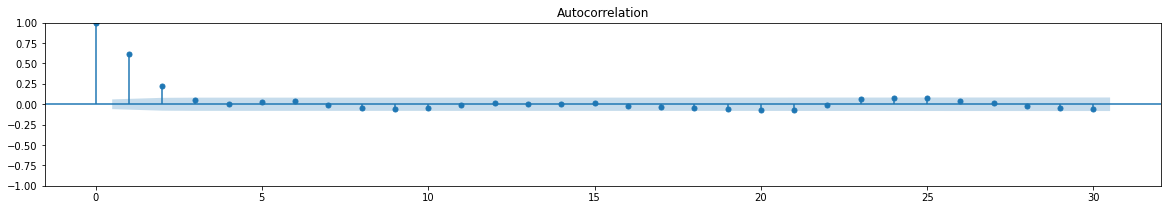

In [101]:
sm.graphics.tsa.plot_acf(df_train['PRES_diff365'].dropna(),lags=30)
plt.show()

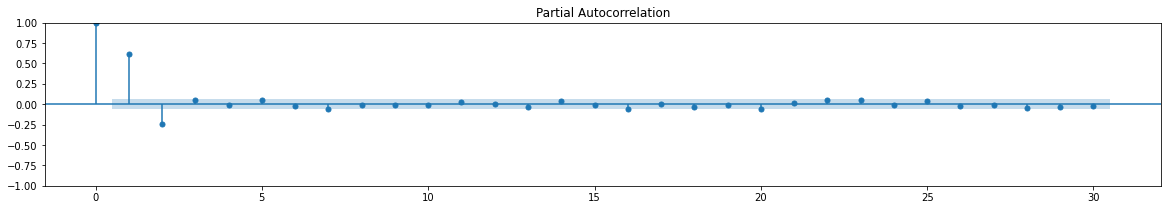

In [102]:
sm.graphics.tsa.plot_pacf(df_train['PRES_diff365'].dropna(),lags=30)
plt.show()

In [103]:
model=AutoReg(df_train['PRES_diff365'].dropna(),lags=2,trend='t',seasonal=False,exog=None,missing='drop')
result2=model.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:           PRES_diff365   No. Observations:                 1081
Model:                     AutoReg(2)   Log Likelihood                 886.878
Method:               Conditional MLE   S.D. of innovations              0.106
Date:                Mon, 20 Feb 2023   AIC                          -1765.756
Time:                        10:39:21   BIC                          -1745.821
Sample:                    03-03-2014   HQIC                         -1758.208
                         - 02-13-2017                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
trend            2.052e-06   5.18e-06      0.396      0.692    -8.1e-06    1.22e-05
PRES_diff365.L1     0.7646      0.029     25.923      0.000       0.707       0.822
PRES_diff365.L2    -0.2460      0.029     -8.347      0.000      -0.304      -0.188
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5542           -1.2844j            2.0162           -0.1099
AR.2            1.5542           +1.2844j            2.0162            0.1099
-----------------------------------------------------------------------------
"""

<Figure size 1440x216 with 0 Axes>

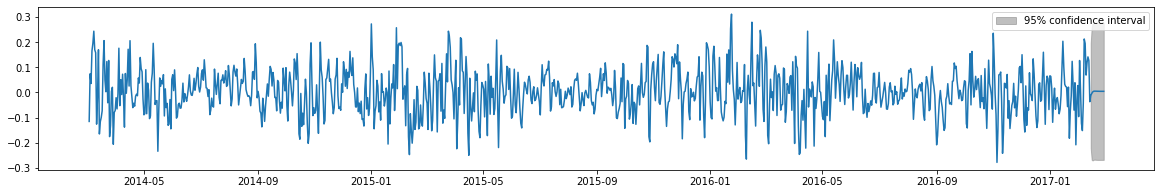

In [109]:
plt.figure(figsize=(20,3))
result2.plot_predict('2014-3-1','2017-02-28')
plt.show()

In [110]:
pred2=result2.predict(start=test_start_day,end='2017-02-28')
df_test['pred_ar365']=pred2
df_test['pred_ar365']=df_test['pred_ar365']+df_test['PRES_lag365']
df_test

,PRES,PRES_scaled,PRES_lag1,PRES_lag365,PRES_diff1,PRES_diff365,pred_ar,pred_ar_real,pred_ar1,pred_ar1_real,pred_ar365
datetime,,,,,,,,,,,
2017-02-14,1029.03,0.779839,0.742944,0.638105,0.036895,0.141734,0.712506,1025.690293,0.759522,1028.022295,0.625823
2017-02-15,1016.74,0.532056,0.779839,0.570565,-0.247782,-0.038508,0.655074,1022.841678,0.758463,1027.969745,0.565875
2017-02-16,1014.79,0.492742,0.532056,0.556048,-0.039315,-0.063306,0.688271,1024.488242,0.520783,1016.180818,0.557709
2017-02-17,1026.46,0.728024,0.492742,0.524798,0.235282,0.203226,0.687363,1024.443219,0.476386,1013.978730,0.529448
2017-02-18,1018.10,0.559476,0.728024,0.685484,-0.168548,-0.126008,0.708622,1025.497630,0.729814,1026.548793,0.690859
2017-02-19,1006.55,0.326613,0.559476,0.724194,-0.232863,-0.397581,0.677586,1023.958275,0.577698,1019.003822,0.729391
2017-02-20,1026.70,0.732863,0.326613,0.644153,0.406250,0.088710,0.605761,1020.395758,0.320470,1006.245304,0.649038
2017-02-21,1026.43,0.727419,0.732863,0.667339,-0.005444,0.060081,0.667169,1023.441568,0.731632,1026.638937,0.672030
2017-02-22,1019.29,0.583468,0.727419,0.879839,-0.143952,-0.296371,0.728908,1026.503845,0.732072,1026.660748,0.884461


In [111]:
print('MAPE:',((df_test['PRES_scaled']-df_test['pred_ar365']).abs()/df_test['PRES_scaled']).replace([np.inf, -np.inf], np.nan).mean())

MAPE: 0.28934184260596074


In [113]:
df_test['pred_ar365_real']=scaler.inverse_transform(df_test[['pred_ar365']])
print('MAPE:', mean_absolute_percentage_error(df_test['PRES'],df_test['pred_ar365_real']))

MAPE: 0.007344825415004873


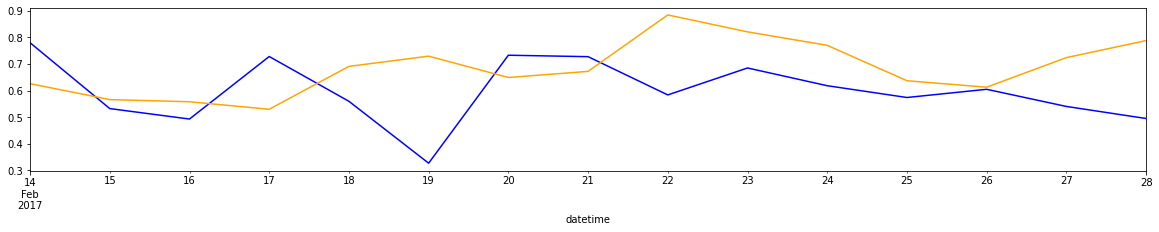

In [114]:
df_test['PRES_scaled'].plot(color='blue')
df_test['pred_ar365'].plot(color='orange')
plt.show()

#### ARIMA for AR1

<AxesSubplot:xlabel='datetime'>

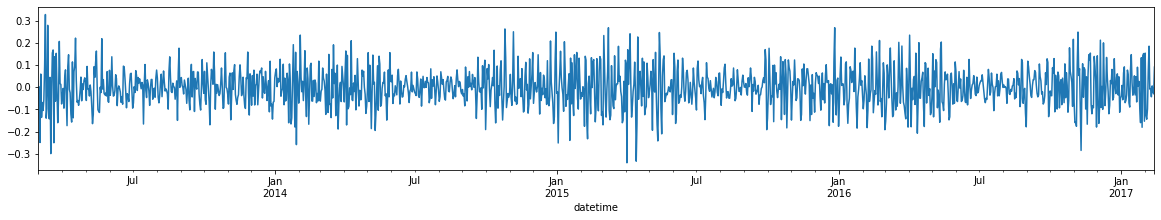

In [115]:
df_train['PRES_diff1'].plot()

In [116]:
from statsmodels.tsa.stattools import adfuller
def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')


In [118]:
check_stationarity(df_train['PRES'].dropna())

The series is NOT stationary


In [117]:
check_stationarity(df_train['PRES_diff1'].dropna())

The series is stationary


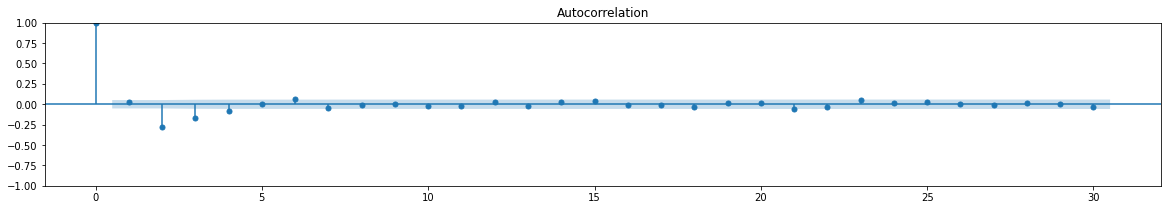

In [119]:
sm.graphics.tsa.plot_acf(df_train['PRES_diff1'].dropna(),lags=30)
plt.show()

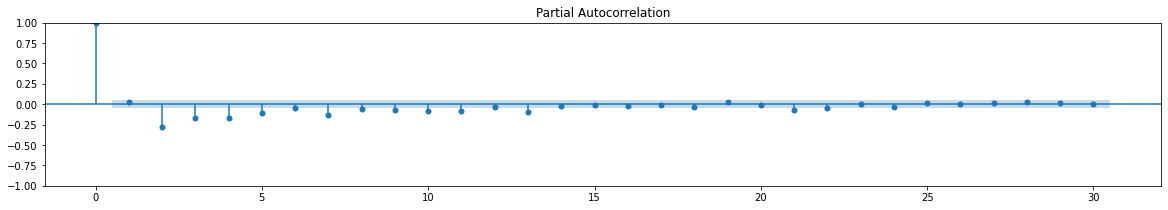

In [120]:
sm.graphics.tsa.plot_pacf(df_train['PRES_diff1'].dropna(),lags=30)
plt.show()

In [121]:
check_stationarity(res_1.seasonal)

The series is stationary


In [129]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df_train['PRES_scaled'],order=(5,1,2),trend='t',seasonal_order=(1,0,0,7))
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                      PRES_scaled   No. Observations:                 1446
Model:             ARIMA(5, 1, 2)x(1, 0, [], 7)   Log Likelihood                1628.019
Date:                          Mon, 20 Feb 2023   AIC                          -3236.038
Time:                                  10:48:45   BIC                          -3183.279
Sample:                              03-01-2013   HQIC                         -3216.347
                                   - 02-13-2017                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          9.828e-05      0.001      0.182      0.856      -0.001       0.001
ar.L1          0.0733      1.765      0.042      0.967      -3.387       3.533
ar.L2          0.1345      1.319      0.102      0.919      -2.451       2.720
ar.L3         -0.1813      0.589     -0.308      0.758      -1.336       0.973
ar.L4         -0.0175      0.086     -0.203      0.839      -0.186       0.151
ar.L5         -0.0402      0.072     -0.561      0.575      -0.181       0.100
ma.L1         -0.1722      1.766     -0.098      0.922      -3.633       3.289
ma.L2         -0.5360      1.492     -0.359      0.719      -3.460       2.388
ar.S.L7       -0.1278      0.035     -3.612      0.000      -0.197      -0.058
sigma2         0.0062      0.000     30.937      0.000       0.006       0.007
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                61.78
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                            -0.23
Prob(H) (two-sided):                  0.92   Kurtosis:                         3.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [130]:
pred=result.predict(start=test_start_day,end='2017-02-28')
df_test['pred_arima']=pred
df_test.tail(20)

,PRES,PRES_scaled,PRES_lag1,PRES_lag365,PRES_diff1,PRES_diff365,pred_ar,pred_ar_real,pred_ar1,pred_ar1_real,pred_ar365,pred_ar365_real,pred_arima
datetime,,,,,,,,,,,,,
2017-02-14,1029.03,0.779839,0.742944,0.638105,0.036895,0.141734,0.712506,1025.690293,0.759522,1028.022295,0.625823,1021.390802,0.755668
2017-02-15,1016.74,0.532056,0.779839,0.570565,-0.247782,-0.038508,0.655074,1022.841678,0.758463,1027.969745,0.565875,1018.417414,0.725751
2017-02-16,1014.79,0.492742,0.532056,0.556048,-0.039315,-0.063306,0.688271,1024.488242,0.520783,1016.180818,0.557709,1018.012352,0.711237
2017-02-17,1026.46,0.728024,0.492742,0.524798,0.235282,0.203226,0.687363,1024.443219,0.476386,1013.978730,0.529448,1016.610625,0.701565
2017-02-18,1018.10,0.559476,0.728024,0.685484,-0.168548,-0.126008,0.708622,1025.497630,0.729814,1026.548793,0.690859,1024.616630,0.701406
2017-02-19,1006.55,0.326613,0.559476,0.724194,-0.232863,-0.397581,0.677586,1023.958275,0.577698,1019.003822,0.729391,1026.527789,0.707591
2017-02-20,1026.70,0.732863,0.326613,0.644153,0.406250,0.088710,0.605761,1020.395758,0.320470,1006.245304,0.649038,1022.542273,0.698966
2017-02-21,1026.43,0.727419,0.732863,0.667339,-0.005444,0.060081,0.667169,1023.441568,0.731632,1026.638937,0.672030,1023.682686,0.699424
2017-02-22,1019.29,0.583468,0.727419,0.879839,-0.143952,-0.296371,0.728908,1026.503845,0.732072,1026.660748,0.884461,1034.219274,0.703896


In [131]:
print('MAPE:',((df_test['PRES_scaled']-df_test['pred_arima']).abs()/df_test['PRES_scaled']).replace([np.inf, -np.inf], np.nan).mean())

MAPE: 0.25967258769130225


In [132]:
df_test['pred_arima_real']=scaler.inverse_transform(df_test[['pred_arima']])
print('MAPE:', mean_absolute_percentage_error(df_test['PRES'],df_test['pred_arima_real']))

MAPE: 0.006151760070708822


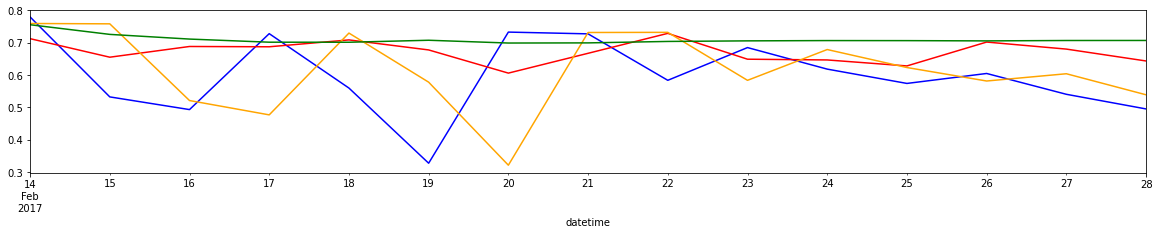

In [133]:
df_test['PRES_scaled'].plot(color='blue')
df_test['pred_ar'].plot(color='red')
df_test['pred_ar1'].plot(color='orange')
df_test['pred_arima'].plot(color='green')
plt.show()

In [134]:
df_test_shifted=df_test[['PRES_scaled']].copy()
training_window=400
train_ts=df_train['PRES_scaled']
test_ts=df_test_shifted
history=[x for x in train_ts]
history=history[(-training_window):]
prediction=list()
for t in range(len(test_ts)):
    model=ARIMA(history,order=(5,1,2),trend='t',seasonal_order=(1,0,0,7),exog=None,missing='drop')
    model_fit=model.fit()
    yhat=model_fit.predict(start=len(history)+1,end=len(history)+1)
    prediction.append(yhat[0])
    obs=list(test_ts.iloc[t])
    # move the training window
    history.append(obs[0])
    history.pop(0)

In [135]:
df_test['pred_arima_w']=prediction

In [136]:
print('MAPE:',mean_absolute_percentage_error(df_test['PRES_scaled'],df_test['pred_arima_w']))

MAPE: 0.19547622690469296


In [137]:
df_test['pred_arima_w_real']=scaler.inverse_transform(df_test[['pred_arima_w']])
print('MAPE:', mean_absolute_percentage_error(df_test['PRES'],df_test['pred_arima_w_real']))

MAPE: 0.004921419982792986


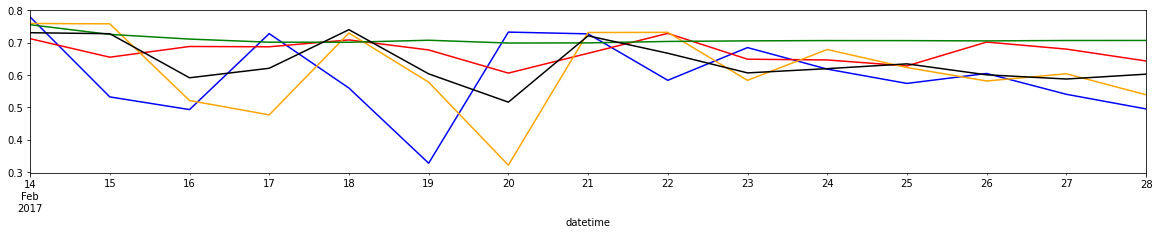

In [138]:
df_test['PRES_scaled'].plot(color='blue')
df_test['pred_ar'].plot(color='red')
df_test['pred_ar1'].plot(color='orange')
df_test['pred_arima'].plot(color='green')
df_test['pred_arima_w'].plot(color='black')
plt.show()